## Analysis of causal model regression on depolarized Bell states


In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

from foqal.utils.io import IO
from foqal.utils.style import StyleConfig

sns.set_theme(style='white')

In [3]:
io = IO.directory(
    folder="simulated-data-causal-two-qubit-depolarizing",
    include_date=False, include_id=False, verbose=False,
)

df = io.load_dataframe("heatmap/latent_dim_plateau.txt")

In [4]:
df

,model,m,p,latent_dim,train_loss,test_loss,kl_test_train,t,lr,n_steps
0,ClassicalCommonCause,50,0.0,5,0.010814,0.010810,0.000377,40.173929,0.1,2000
1,Superdeterminism,50,0.0,5,0.006557,0.006600,0.000377,57.031877,0.1,2000
2,Superluminal,50,0.0,5,NaN,NaN,0.000377,40.421980,0.1,2000
3,ClassicalCommonCause,50,0.0,10,0.007879,0.007918,0.000377,44.354694,0.1,2000
4,Superdeterminism,50,0.0,10,NaN,NaN,0.000377,65.333272,0.1,2000
...,...,...,...,...,...,...,...,...,...,...
655,Superdeterminism,50,1.0,95,0.000061,0.000319,0.000379,247.835250,0.1,2000
656,Superluminal,50,1.0,95,0.000061,0.000315,0.000379,316.634992,0.1,2000
657,ClassicalCommonCause,50,1.0,100,0.000122,0.000255,0.000379,207.392213,0.1,2000
658,Superdeterminism,50,1.0,100,0.000061,0.000319,0.000379,153.867825,0.1,2000


In [5]:
df.latent_dim.unique()

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100], dtype=int64)

In [20]:
trains = {}
tests = {}
for model in df.model.unique():
    dfi = df[df.model == model]

    train = dfi.pivot(index='latent_dim', columns='p', values='train_loss')
    test = dfi.pivot(index='latent_dim', columns='p', values='test_loss')

    trains[model] = train
    tests[model] = test

In [38]:
def heatmap(model, vmin, vmax):
    fig, axs = plt.subplots(1, 2, figsize=[8, 4])
    sns.heatmap(trains[model], ax=axs[0], cmap="crest", norm=LogNorm(vmin=vmin, vmax=vmax))
    sns.heatmap(tests[model], ax=axs[1], cmap="crest", norm=LogNorm(vmin=vmin, vmax=vmax))
    fig.suptitle(f"{model}, m={df.m.unique()[0]}")
    plt.tight_layout()
    return fig

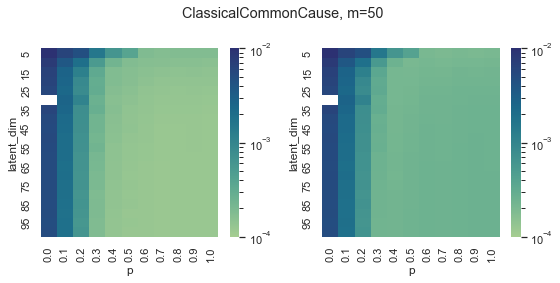

In [42]:
_ = heatmap("ClassicalCommonCause", vmin=1e-4, vmax=1e-2)

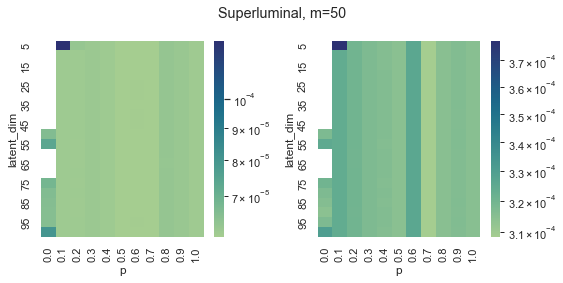

In [46]:
_ = heatmap("Superluminal", vmin=None, vmax=None)

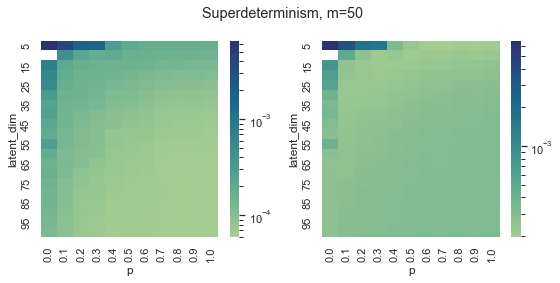

In [47]:
_ = heatmap("Superdeterminism", vmin=None, vmax=None)